# Analysing Data

#### Jump to <a href="#3.-Conclusion">Inital Conclusion</a>
#### Jump to <a href="#Performing-PCA">Priciple Component Analysis</a>
#### Jump to <a href="#Conclusion-:">Final Conclusion</a>

## 1. Importing Data to numpy array

In [2]:
import numpy as np
data = np.genfromtxt("data.txt",names=True)

## 2. Performing Plots to analyse Data

In [3]:
from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib.pyplot import figure

In [4]:
#seperate dataset basing on labels
label1 = data[data['Label'] == 1]
label2 = data[data['Label'] == 2]

### Performing pariwise plots between all features

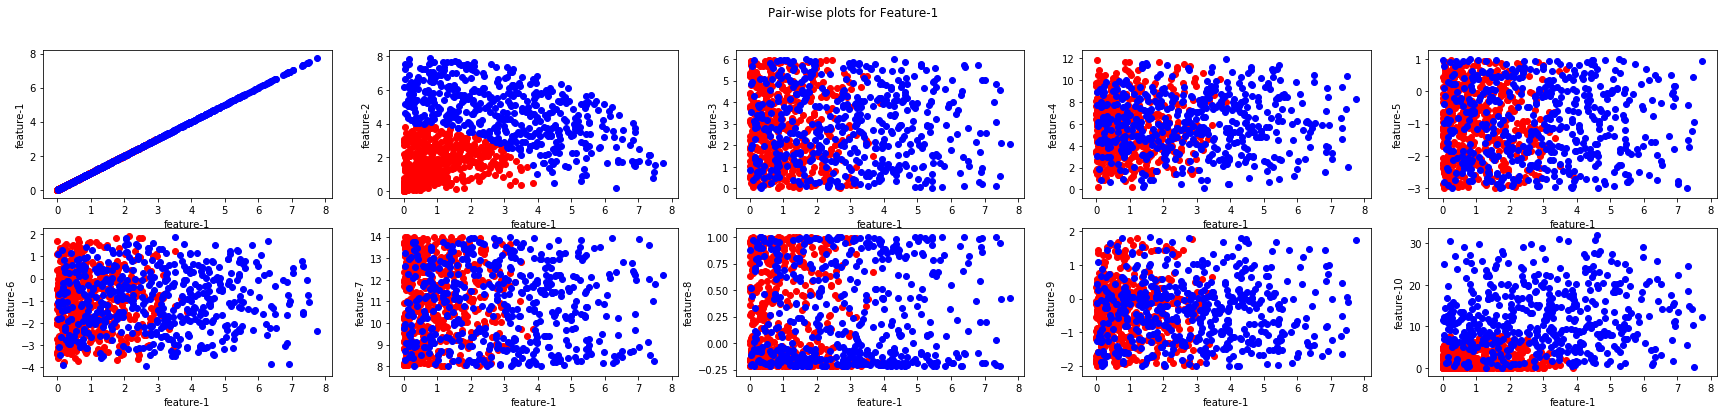

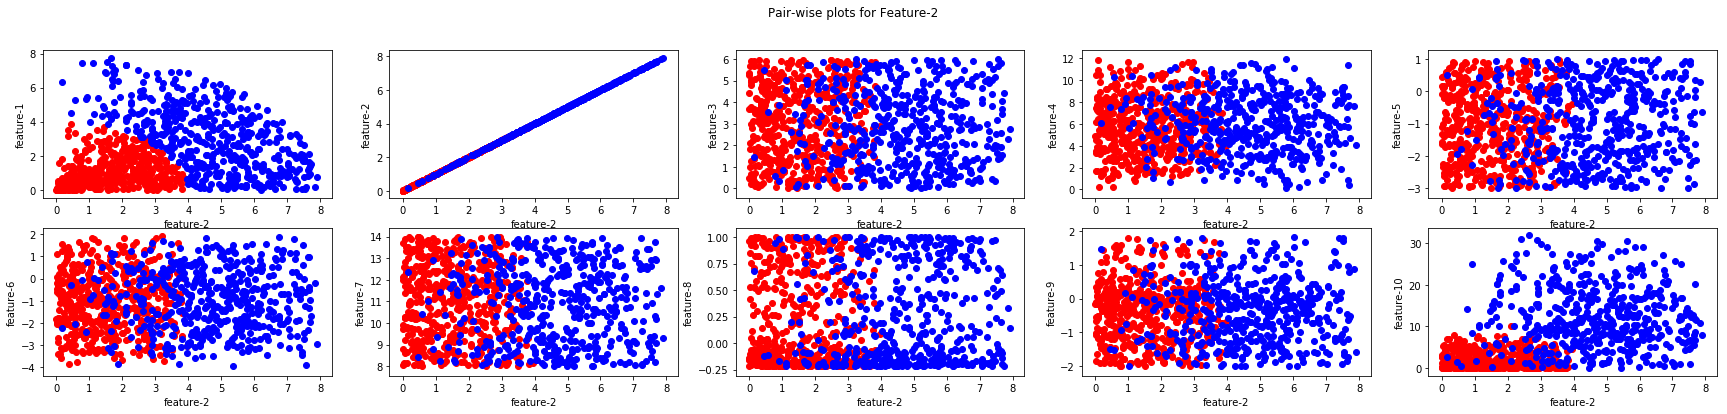

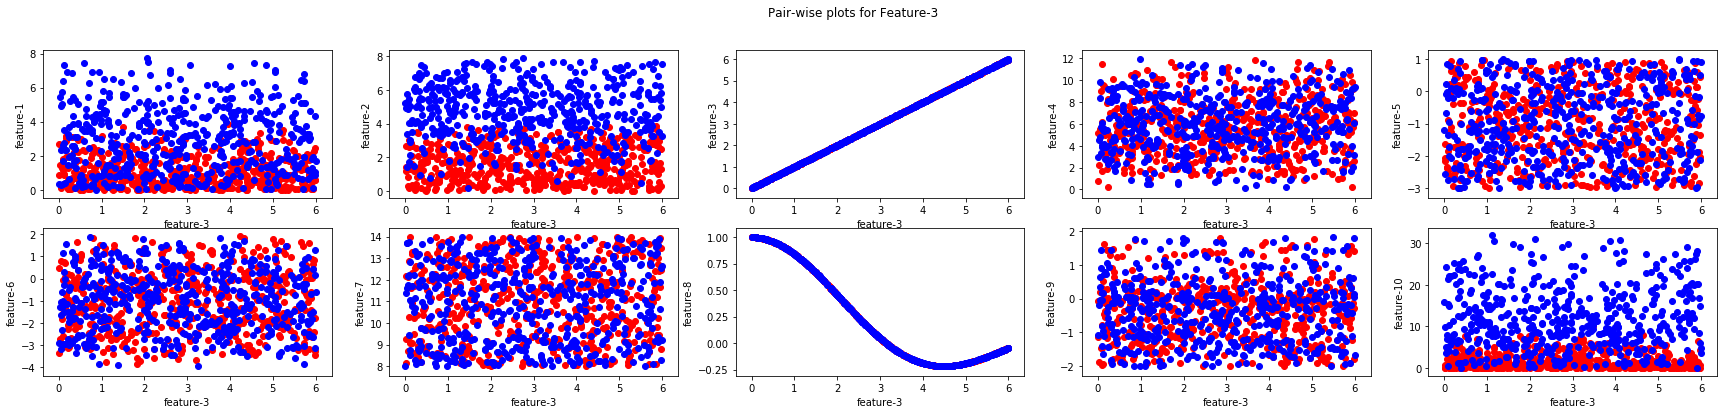

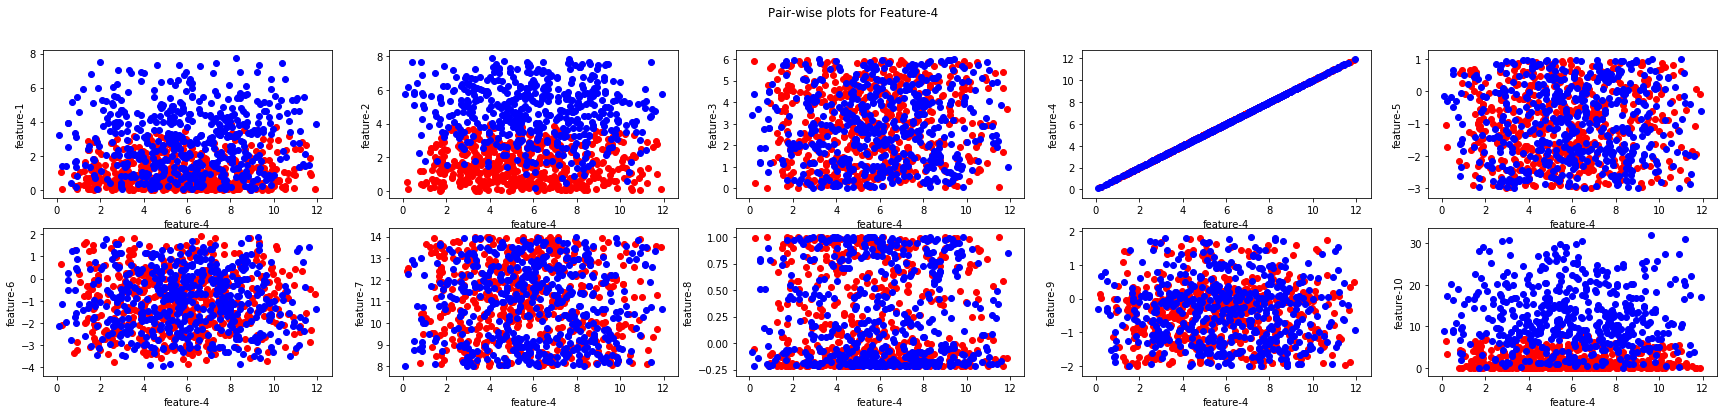

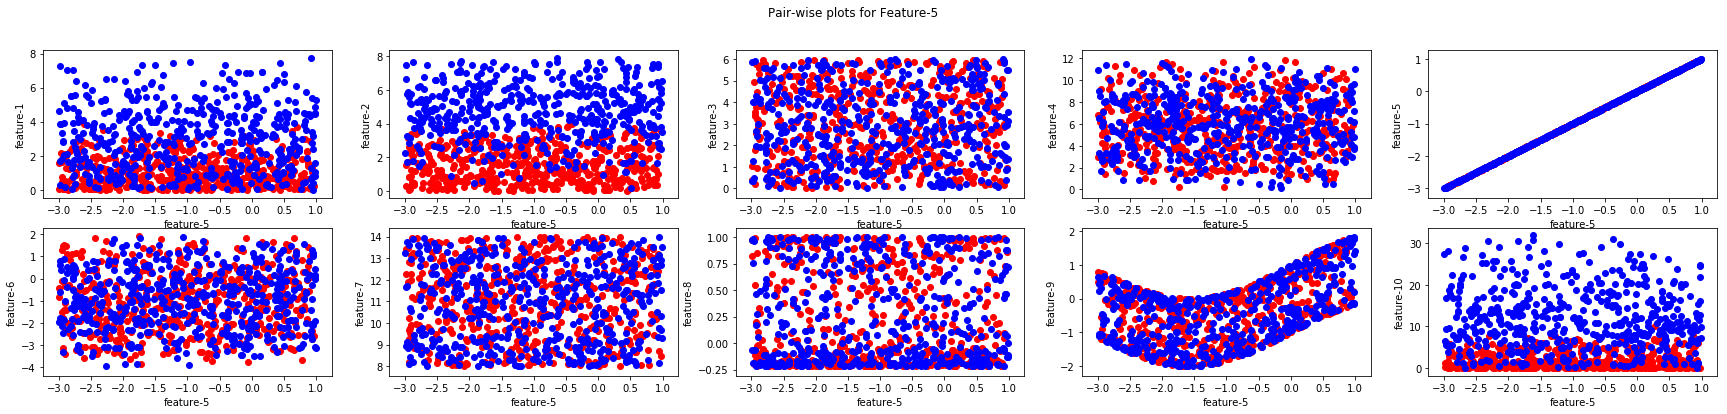

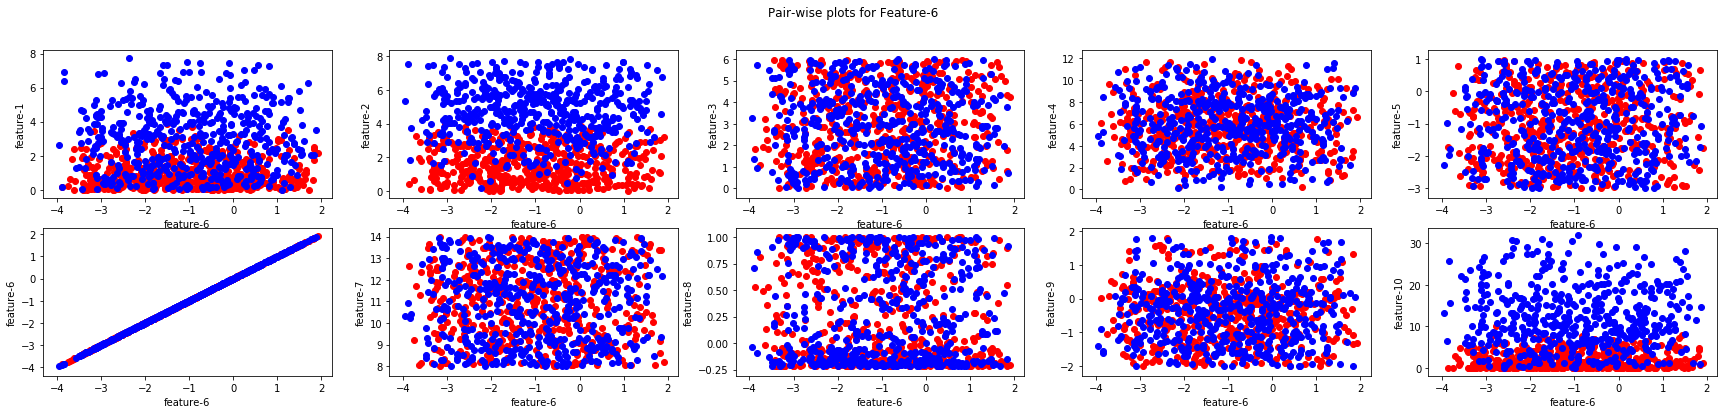

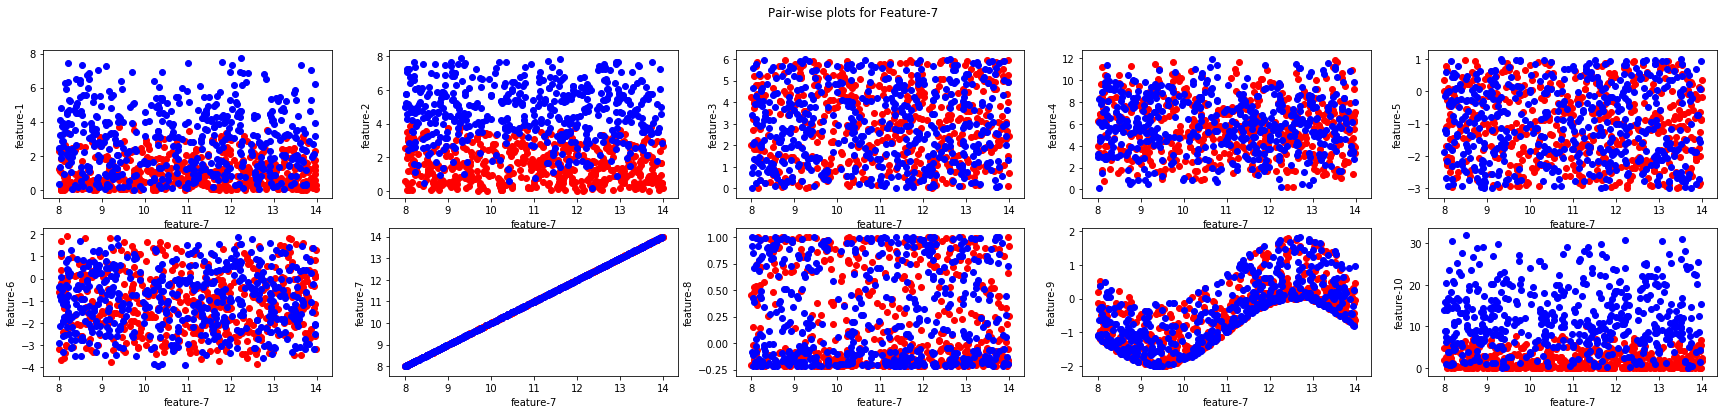

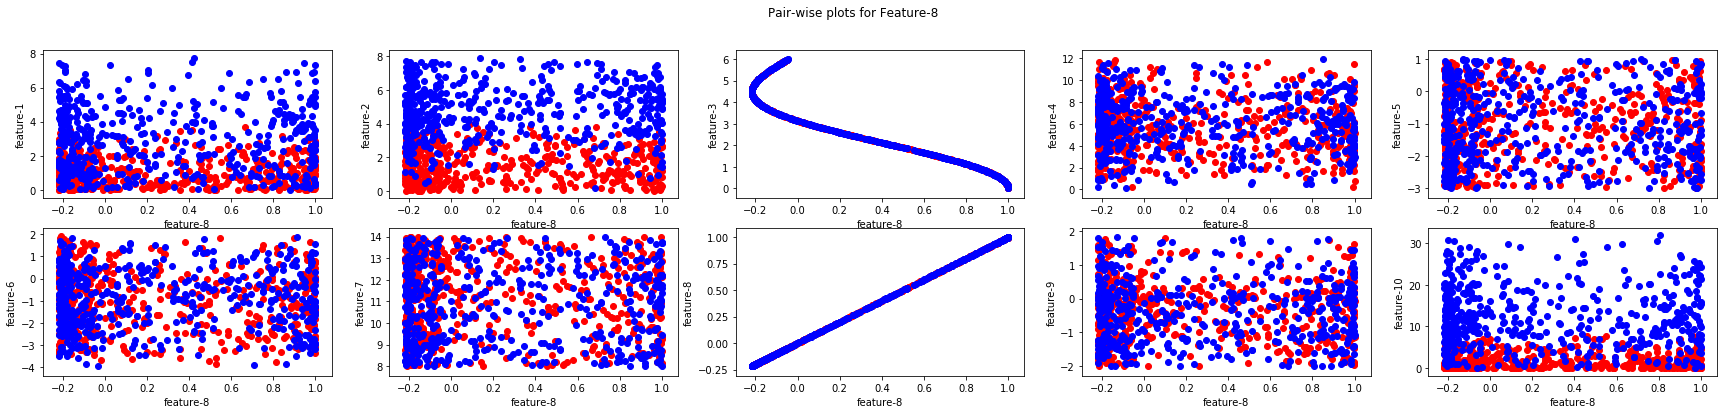

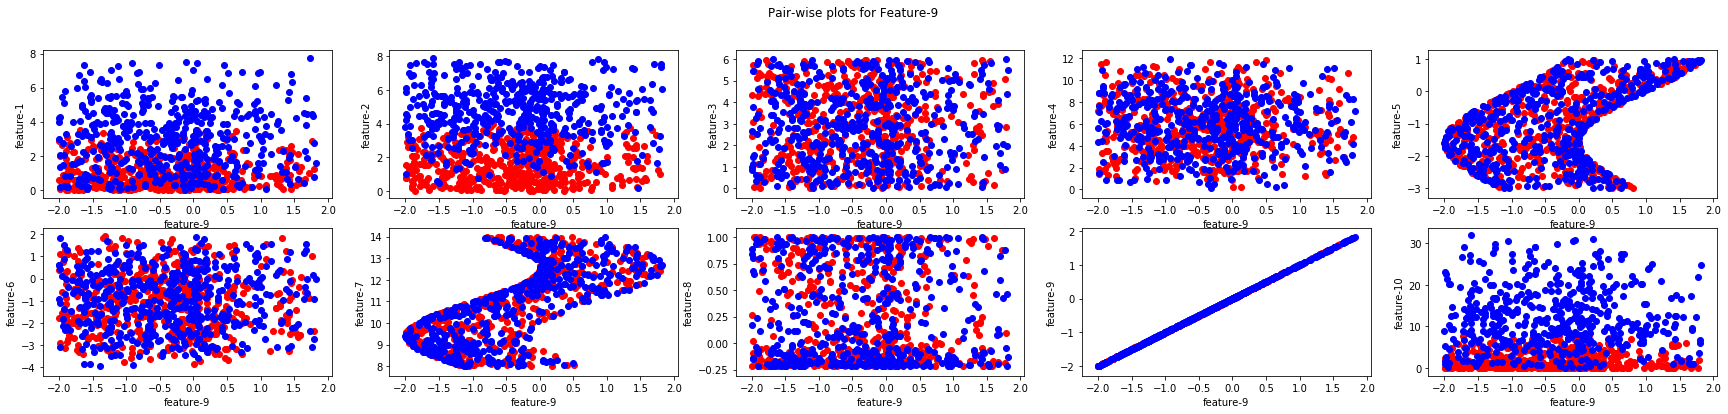

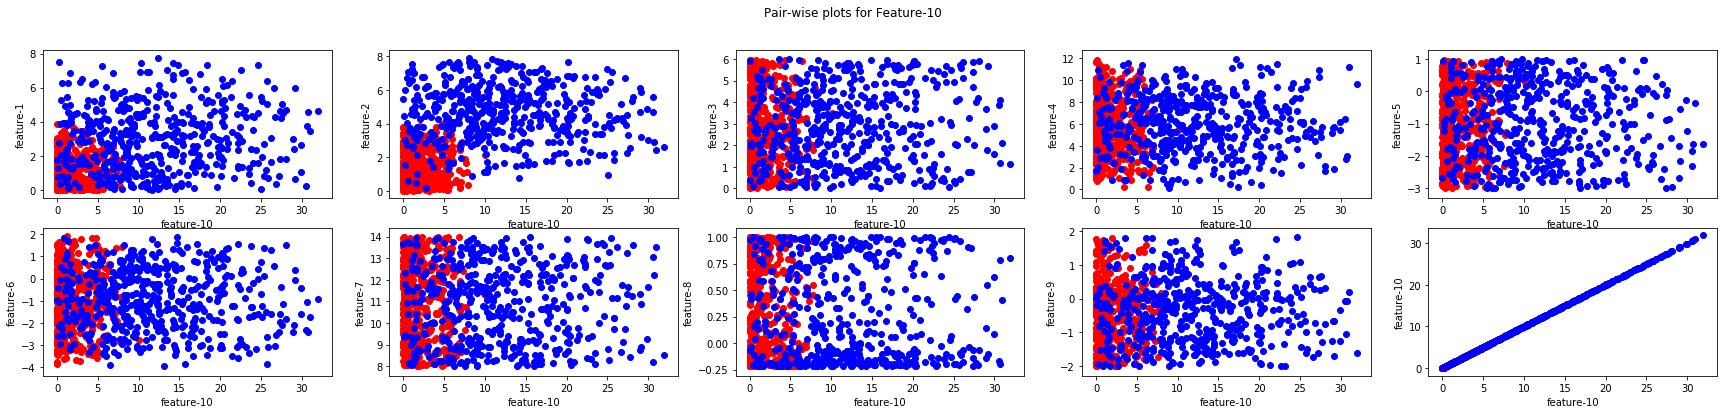

In [11]:
for j in range(1,11):
    f, axs = plt.subplots(2,5,figsize=(30,6))
    f.suptitle("Pair-wise plots for Feature-%d" % j)
    for i,fe in enumerate(data.dtype.names):
        if(i == 0):
            continue
        s = '%d' % j
        plt.subplot(2,5,i)
        plt.scatter(s,fe,data=label1,c = [1,0,0])
        plt.scatter(s,fe,data=label2,c = [0,0,1])
        plt.xlabel('feature-%s' % s)
        plt.ylabel('feature-%d' % i)
    plt.show()

## Further observe feature 1 vs 2 plot

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

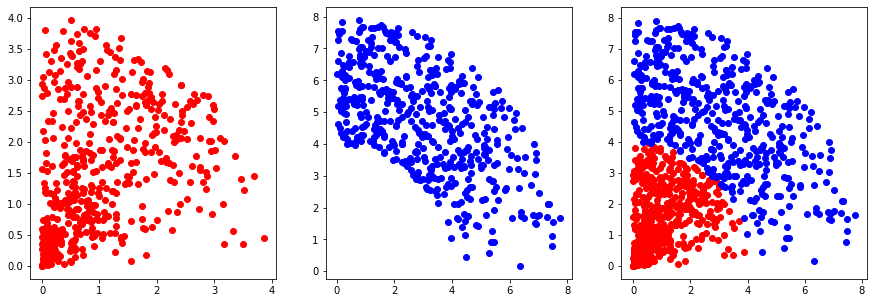

In [5]:
f, axs = plt.subplots(1,2,figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter('1','2',data=label1,c = [1,0,0])
plt.subplot(1,3,2)
plt.scatter('1','2',data=label2,c = [0,0,1])
plt.subplot(1,3,3)
plt.scatter('1','2',data=label1,c = [1,0,0])
plt.scatter('1','2',data=label2,c = [0,0,1])
plt.show()

## 3. Conclusion

### From Above plots We can Observe
* Label-1 and Label-2 are almost seperated

### <i>We can able plot a curve that can almost perfectly classify given Data Basing on Features '1' and '2'</i>

#### * skip-content next prefrebly jump to PCA 
## Jump to <a href="#Performing-PCA">Priciple Component Analysis</a>

In [6]:
data.dtype.names

('Label', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10')

In [9]:
import pandas as pd
df = pd.DataFrame(data=data,index = [i for i in range(data.shape[0])],columns=data.dtype.names)

In [22]:
df.head()

Label      1         2         3         4         5         6          7  \
0    2.0  3.201  5.774701  3.429272  0.108732 -0.146594 -2.140013   8.025347   
1    1.0  1.066  0.519693  5.936320  0.194729 -1.031533  0.678119  12.408875   
2    2.0  1.395  6.184605  4.393927  0.236128 -0.306630 -1.152583  12.271188   
3    1.0  0.062  0.106774  0.227877  0.241525 -1.734883 -2.111483  12.531931   
4    2.0  1.416  7.687776  3.696551  0.416807 -0.167303 -1.977925  12.915153   

          8         9         10  
0 -0.082737 -0.316598   8.970595  
1 -0.057266  0.129536   6.406818  
2 -0.216143  0.654902  17.425628  
3  0.991368  0.012839   3.487370  
4 -0.142540  0.773266  20.234659

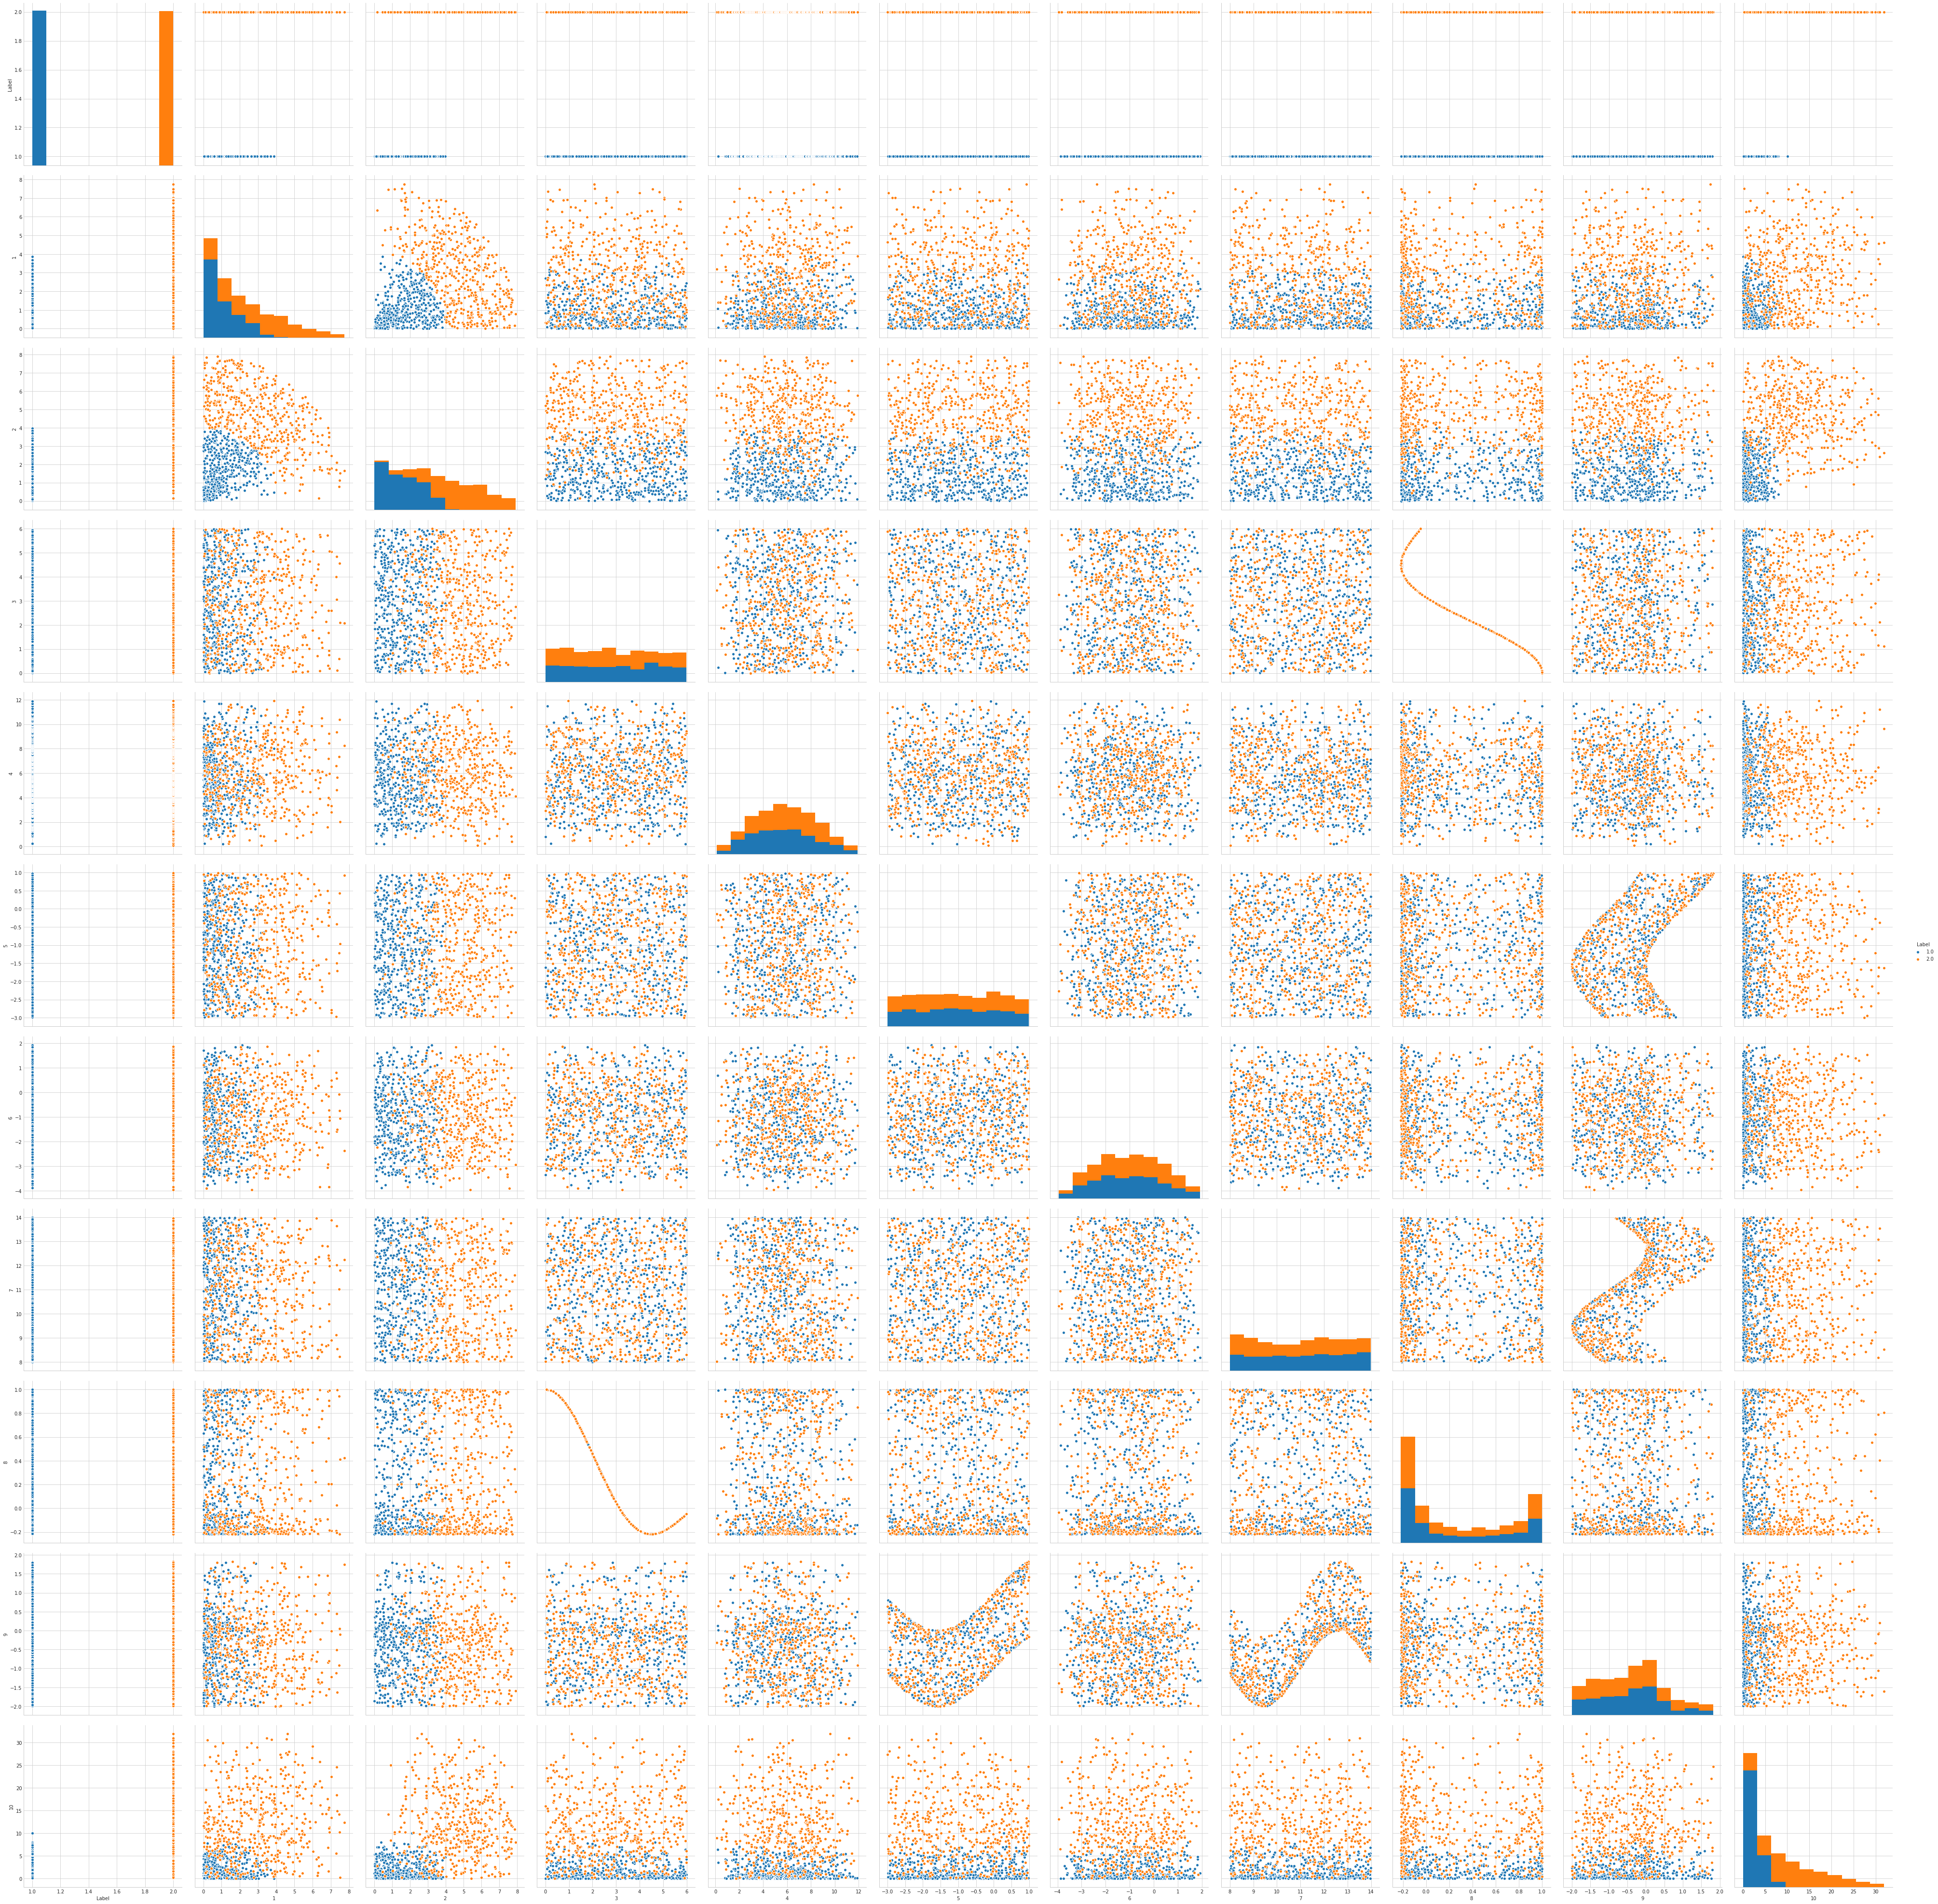

In [15]:
import seaborn as sns
plt.close()
sns.set_style('whitegrid')
sns.pairplot(df,hue='Label',size=5)
plt.show()

### Performing Distribution plots

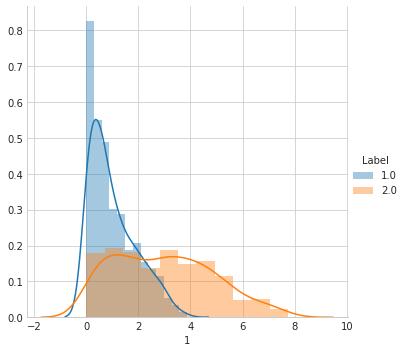

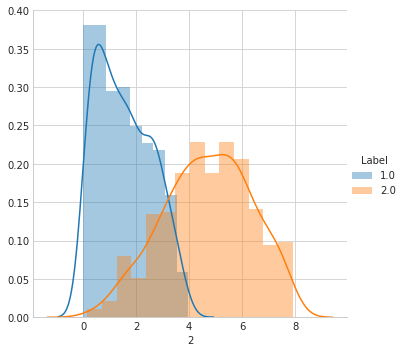

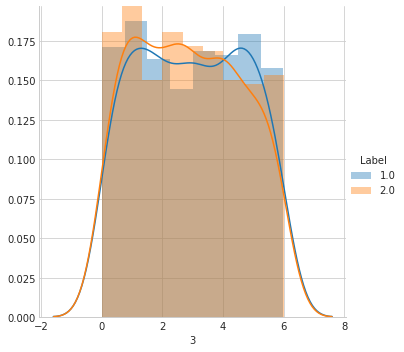

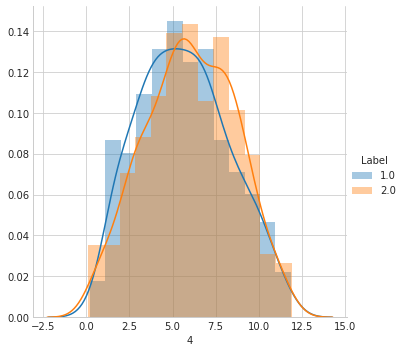

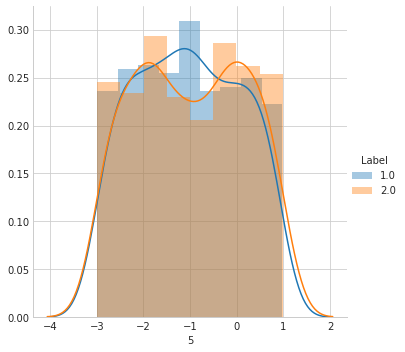

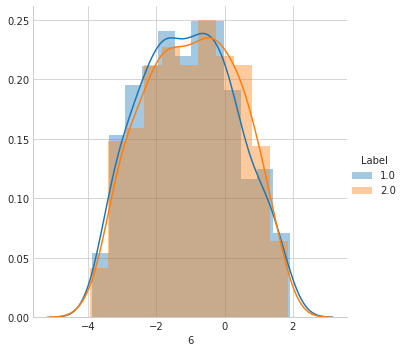

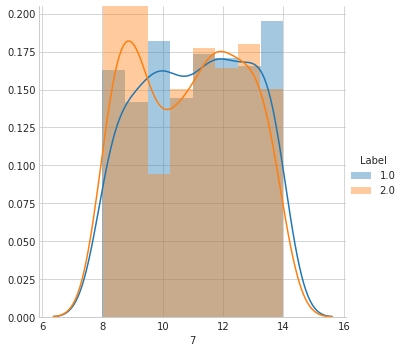

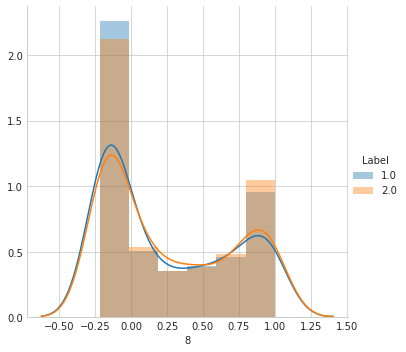

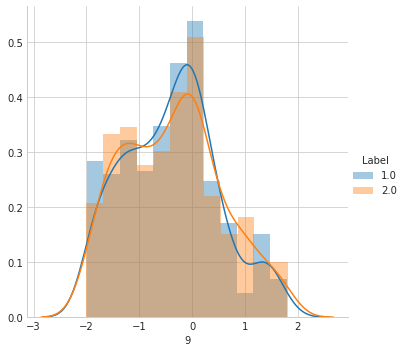

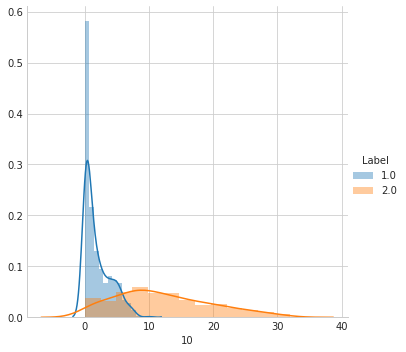

In [32]:
for i in data.dtype.names:
    if(i == 'Label'):
        continue
    sns.FacetGrid(df, hue='Label', size=5).map(sns.distplot, i).add_legend()
    plt.show()

#### From the Graphs you can observe that features '2' and '10' have better seperation

## Let's observe features '2' and '10' further

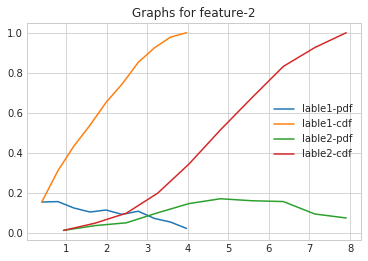

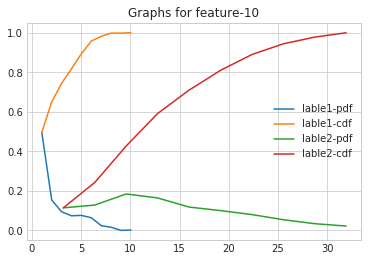

In [41]:
counts, bin_edges = np.histogram(label1['2'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.title('Graphs for feature-2')
plt.plot(bin_edges[1:],pdf,label='lable1-pdf')
plt.plot(bin_edges[1:],cdf,label='lable1-cdf')
counts, bin_edges = np.histogram(label2['2'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='lable2-pdf')
plt.plot(bin_edges[1:],cdf,label='lable2-cdf')
plt.legend()
plt.show()
plt.title('Graphs for feature-10')
counts, bin_edges = np.histogram(label1['10'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='lable1-pdf')
plt.plot(bin_edges[1:],cdf,label='lable1-cdf')
counts, bin_edges = np.histogram(label2['10'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='lable2-pdf')
plt.plot(bin_edges[1:],cdf,label='lable2-cdf')
plt.legend()
plt.show()

### From the plots you can observe that:
* Around 85% of label1 have feature-'2' less than 3 and less than 19% of label2 have feature-'2' less than 3
* Around 85% of label1 have feature-'10' less than 5 and 20% of label2 have feature-'10' less than 5

In [13]:
fin1 = data[(data['10'] < 5)]
fin2 = data[(data['10'] > 5)]

In [8]:
df = pd.DataFrame(fin1)
import seaborn as sns
plt.close()
sns.set_style('whitegrid')
sns.pairplot(df,hue='Label',size=5)
plt.show()

NameError: name 'pd' is not defined

In [16]:
label1 = fin1[fin1['Label'] == 1]
label2 = fin1[fin1['Label'] == 2]
print(label1.shape)
print(label2.shape)

(446,)
(88,)


# Performing PCA

In [16]:
# normalize data
from sklearn.preprocessing import StandardScaler
labels = data['Label']
data_nolabel = data[[i for i in data.dtype.names if i!='Label']]
print(data_nolabel.dtype.names)

('1', '2', '3', '4', '5', '6', '7', '8', '9', '10')


In [107]:
#df.drop(columns='Label')
df = pd.DataFrame(data=data,index = [i for i in range(data.shape[0])],columns=data.dtype.names)
df = df.drop('Label',axis=1)
df.head()

1         2         3         4         5         6          7  \
0  3.201  5.774701  3.429272  0.108732 -0.146594 -2.140013   8.025347   
1  1.066  0.519693  5.936320  0.194729 -1.031533  0.678119  12.408875   
2  1.395  6.184605  4.393927  0.236128 -0.306630 -1.152583  12.271188   
3  0.062  0.106774  0.227877  0.241525 -1.734883 -2.111483  12.531931   
4  1.416  7.687776  3.696551  0.416807 -0.167303 -1.977925  12.915153   

          8         9         10  
0 -0.082737 -0.316598   8.970595  
1 -0.057266  0.129536   6.406818  
2 -0.216143  0.654902  17.425628  
3  0.991368  0.012839   3.487370  
4 -0.142540  0.773266  20.234659

In [128]:
from sklearn import decomposition
pca = decomposition.PCA()
# PCA for dimensionality redcution (non-visualization)
data_scaled = pd.DataFrame(StandardScaler().fit_transform(df),columns = df.columns) 
pca.n_components = 2
pca_data = pca.fit_transform(data_scaled)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
print(percentage_var_explained)
cum_var_explained = np.cumsum(percentage_var_explained)
print(cum_var_explained)


[0.52313479 0.47686521]
[0.52313479 1.        ]


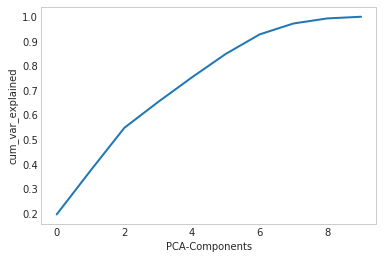

In [122]:
# Plot the PCA spectrum
# plt.plot(cum_var_explained, linewidth=2)
# plt.grid()
# plt.xlabel('n_components')
# plt.ylabel('Cumulative_explained_variance')
# plt.show()
plt.plot(cum_var_explained, linewidth=2)
plt.xlabel('PCA-Components')
plt.ylabel('cum_var_explained')
plt.grid()
plt.show()

In [123]:
pca_data

array([[-0.17939507,  1.385414  ,  0.238842  , ..., -0.78972082,
         0.64564231, -0.26170424],
       [-1.99656942, -0.99659158, -0.16965599, ...,  0.70733469,
        -0.00529512,  0.74391614],
       [-1.2993591 ,  0.45378057,  1.93186323, ...,  0.29430918,
         0.09689478, -0.14858998],
       ...,
       [-2.19198877, -0.89287101, -0.25568398, ...,  0.14458713,
         0.13600043,  0.34055344],
       [-1.85750066, -1.98222076,  0.11246573, ...,  0.55229158,
        -0.37263128, -0.38485443],
       [ 2.05818296,  1.56963505,  1.27764722, ...,  0.0976867 ,
        -0.52938162,  0.09760267]])

In [129]:
final = pca.components_
print(np.sum(np.square(final),axis=1))

[1. 1.]


* From above you can observe that atleast 6-components are required to retain more than 90% of features

In [130]:
from scipy.linalg import eigh
std_data = StandardScaler().fit_transform(df)
cov_mat = np.matmul(std_data.T,std_data)
values, vectors = eigh(cov_mat)
data_ret = (values[9]+values[8])/sum(values)
print(" var_explained %f " % data_ret)
# print(np.argsort(vectors))
# print("PC_1: ",(vectors[9]),np.argsort(vectors[9]))
# print("PC_2: ",(vectors[8]),np.argsort(vectors[8]))
print(np.sum(np.square(vectors),axis=1))

 var_explained 0.373712 
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [90]:
pd.DataFrame(std_data).head()

0         1         2         3         4         5         6  \
0  0.679113  1.274089  0.289958 -2.202699  0.761822 -0.830161 -1.664245   
1 -0.528303 -1.244238  1.727531 -2.169671 -0.015494  1.236864  0.802998   
2 -0.342242  1.470525  0.843103 -2.153771  0.621249 -0.105908  0.725502   
3 -1.096100 -1.442120 -1.545761 -2.151698 -0.633306 -0.809235  0.872260   
4 -0.330366  2.190881  0.443219 -2.084377  0.743631 -0.711274  1.087954   

          7         8         9  
0 -0.766151  0.066466  0.266898  
1 -0.708856  0.556694 -0.077329  
2 -1.066243  1.133985  1.402117  
3  1.650004  0.428463 -0.469310  
4 -0.900677  1.264048  1.779273

* By using two most variant components we can retain only ~37% data
* The components are completly different from features 1 and 2

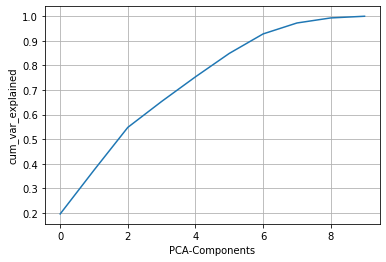

In [35]:
temp = values
temp[::-1].sort()
data_ret = temp/np.sum(temp)
cum_data_ret = np.cumsum(data_ret)
plt.plot(np.arange(10),cum_data_ret)
plt.xlabel('PCA-Components')
plt.ylabel('cum_var_explained')
plt.grid()
plt.show()

In [125]:
print(pca_data.shape,labels.shape)
pca_dta = np.vstack((labels.T,pca_data.T)).T
pca_df = pd.DataFrame(pca_dta)
pca_df.head()

(999, 10) (999,)


0         1         2         3         4         5         6         7  \
0  2.0 -0.179395  1.385414  0.238842  0.231482  1.011636  2.736245  0.201786   
1  1.0 -1.996569 -0.996592 -0.169656  0.617809  2.342812  0.249221  0.719525   
2  2.0 -1.299359  0.453781  1.931863  1.210804  1.596581  1.581975 -0.824125   
3  1.0  1.718595 -2.613735 -0.592570  1.718469  0.728745  0.915890  0.446728   
4  2.0 -0.894040  0.591107  2.611005  1.631690  1.163620  1.869751 -1.277307   

          8         9        10  
0 -0.789721  0.645642 -0.261704  
1  0.707335 -0.005295  0.743916  
2  0.294309  0.096895 -0.148590  
3  0.757419  0.068961  0.077863  
4  0.190857 -0.108258 -0.330837

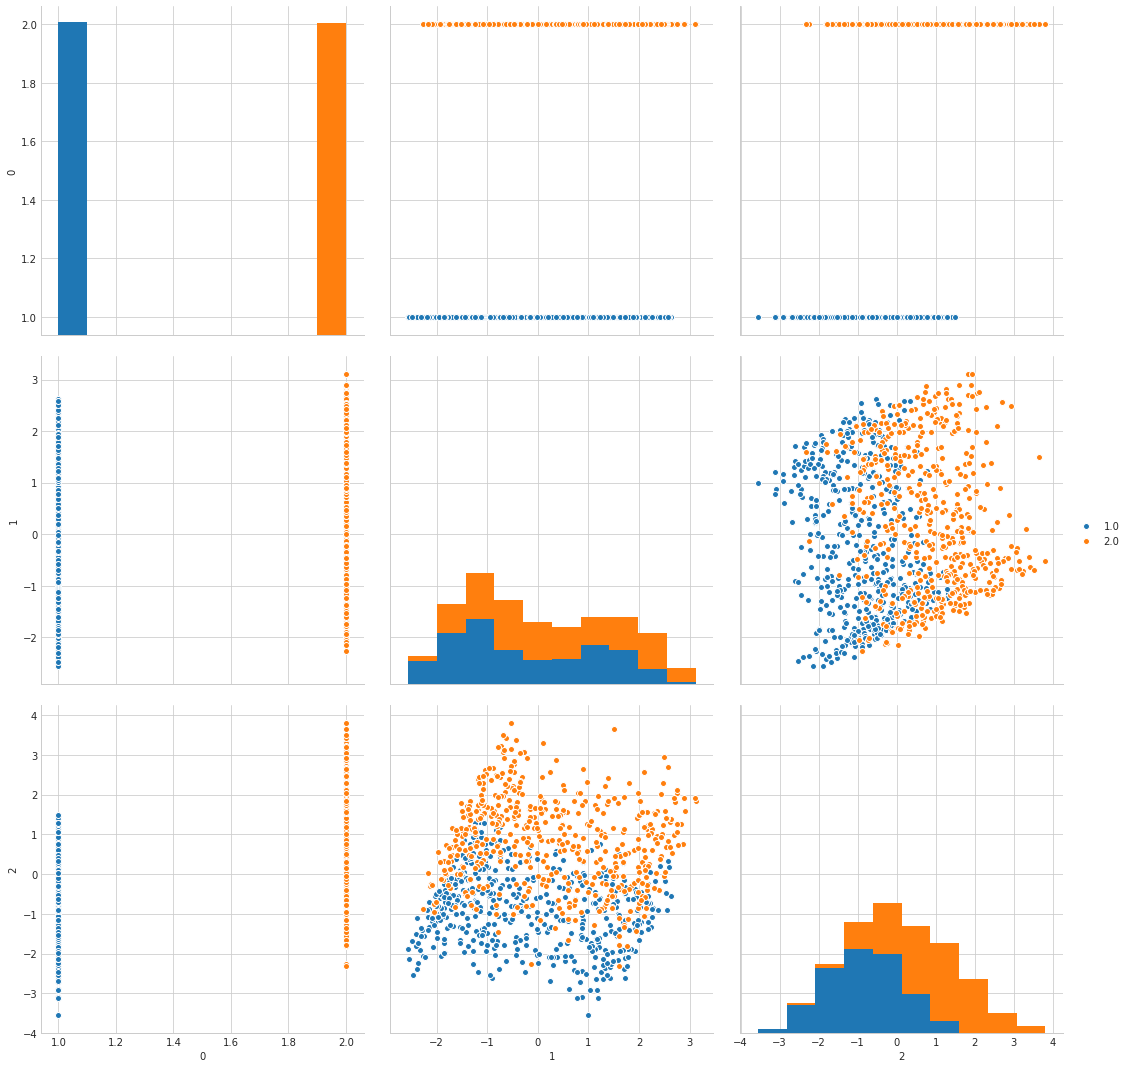

In [120]:
import seaborn as sns
plt.close()
sns.set_style('whitegrid')
sns.pairplot(pca_df,hue=0,size=5)
plt.show()

## Conclusion : 
* More than 6 components are required to retain more than 90% of data variance
* The first component has most variance in the direction of feature 8
* The second component has most variance in the direction of feature 10